In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset with encoding handling
try:
    df = pd.read_csv('Movie dataset.csv', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv('Movie dataset.csv', encoding='ISO-8859-1')

# Display basic info about the dataset
print(df.info())

# Check a few rows of the dataframe to understand the structure of the data
print(df.head())

# Convert Duration and Votes to numeric
# First, let's check if there are any non-numeric characters in these columns
print(df['Duration'].unique())
print(df['Votes'].unique())

# Remove any non-numeric characters from Duration and Votes
df['Duration'] = df['Duration'].str.extract(r'(\d+)').astype(float)










<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Ro

In [ ]:
# Clean the Votes column by removing non-numeric characters and converting to float
df['Votes'] = df['Votes'].str.replace('[^\d.]', '', regex=True).astype(float)

# Display basic info after conversion
print(df.info())

# Data Cleaning
# Handle missing values by removing rows with missing target values
df = df.dropna(subset=['Rating'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   float64
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   float64
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.2+ MB
None


In [ ]:
# Impute missing values in other columns with the mean or a placeholder
df.fillna({
    'Genre': 'Unknown',
    'Director': 'Unknown',
    'Actor 1': 'Unknown',
    'Actor 2': 'Unknown',
    'Actor 3': 'Unknown',
    'Duration': df['Duration'].mean(),  # Assuming Duration is numerical
    'Votes': df['Votes'].mean()  # Assuming Votes is numerical
}, inplace=True)

# Display basic info after cleaning
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7919 non-null   object 
 1   Year      7919 non-null   object 
 2   Duration  7919 non-null   float64
 3   Genre     7919 non-null   object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   float64
 6   Director  7919 non-null   object 
 7   Actor 1   7919 non-null   object 
 8   Actor 2   7919 non-null   object 
 9   Actor 3   7919 non-null   object 
dtypes: float64(3), object(7)
memory usage: 680.5+ KB
None


<ipython-input-7-e96db77a5553>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna({


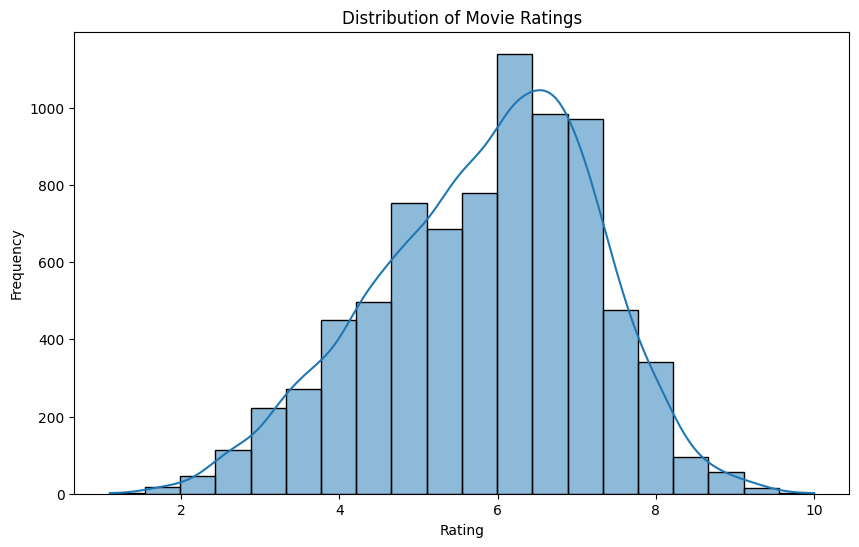

In [ ]:
# EDA
# Plot distribution of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Feature Engineering
# Convert categorical variables to numeric using one-hot encoding
categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Check for any remaining non-numeric columns
non_numeric_cols = df_encoded.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols) # Print any non-numeric columns

# Convert any remaining non-numeric columns to numeric (if necessary)
# For example, if 'Name' column is still non-numeric, you could drop it:
if 'Name' in df_encoded.columns:
    df_encoded = df_encoded.drop('Name', axis=1)

# --- BEGIN_SOLUTION ---
# Drop the 'Year' column as it's causing the error
if 'Year' in df_encoded.columns:
    df_encoded = df_encoded.drop('Year', axis=1)
# --- END_SOLUTION ---

# Split data into features and target variable
X = df_encoded.drop('Rating', axis=1)
y = df_encoded['Rating']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Non-numeric columns: Index(['Name', 'Year', 'Genre_Action', 'Genre_Action, Adventure',
       'Genre_Action, Adventure, Biography', 'Genre_Action, Adventure, Comedy',
       'Genre_Action, Adventure, Crime', 'Genre_Action, Adventure, Drama',
       'Genre_Action, Adventure, Family', 'Genre_Action, Adventure, Fantasy',
       ...
       'Actor 3_Zarine Ali', 'Actor 3_Zayed Khan', 'Actor 3_Zebunissa',
       'Actor 3_Zeenat Aman', 'Actor 3_Zeeshan Khan', 'Actor 3_Zeishan Quadri',
       'Actor 3_Zenobia Shroff', 'Actor 3_Zohra', 'Actor 3_Zoya Hussain',
       'Actor 3_Zulfi Sayed'],
      dtype='object', length=12066)


In [ ]:
# Model Building
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f'{name}:')
    print(f'  Root Mean Squared Error: {rmse}')
    print(f'  R-squared: {r2}')
    print()

Linear Regression:
  Root Mean Squared Error: 9739583.108382627
  R-squared: -51023170300897.61

Ridge Regression:
  Root Mean Squared Error: 1.1938959903618442
  R-squared: 0.23331018937582093

Lasso Regression:
  Root Mean Squared Error: 1.3522685918116808
  R-squared: 0.01641334803566996

Random Forest:
  Root Mean Squared Error: 1.1932627495340264
  R-squared: 0.23412327617767315



In [ ]:
# Display some predictions vs actual ratings
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

       Actual  Predicted
9456      3.3      4.839
14816     5.3      4.918
3213      5.7      5.906
3778      7.2      6.675
5775      3.5      4.242


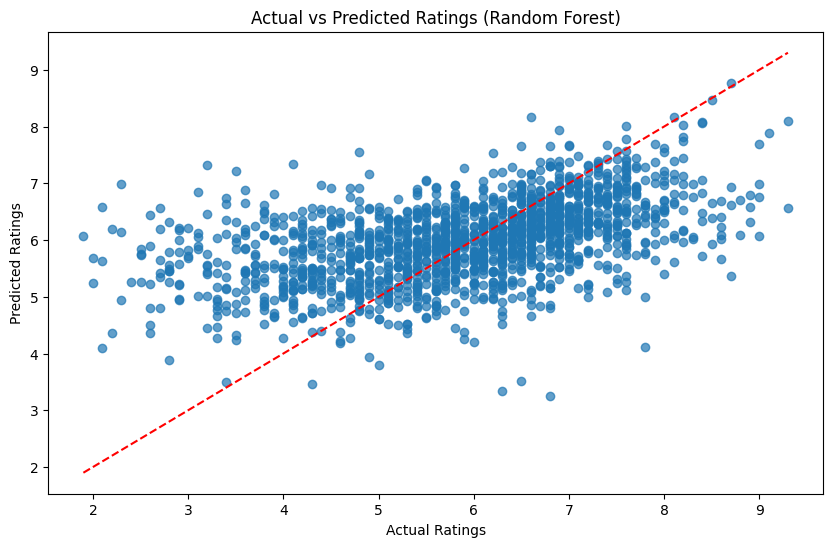

In [ ]:
# Visualize the comparison
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title(f'Actual vs Predicted Ratings ({name})')
plt.show()

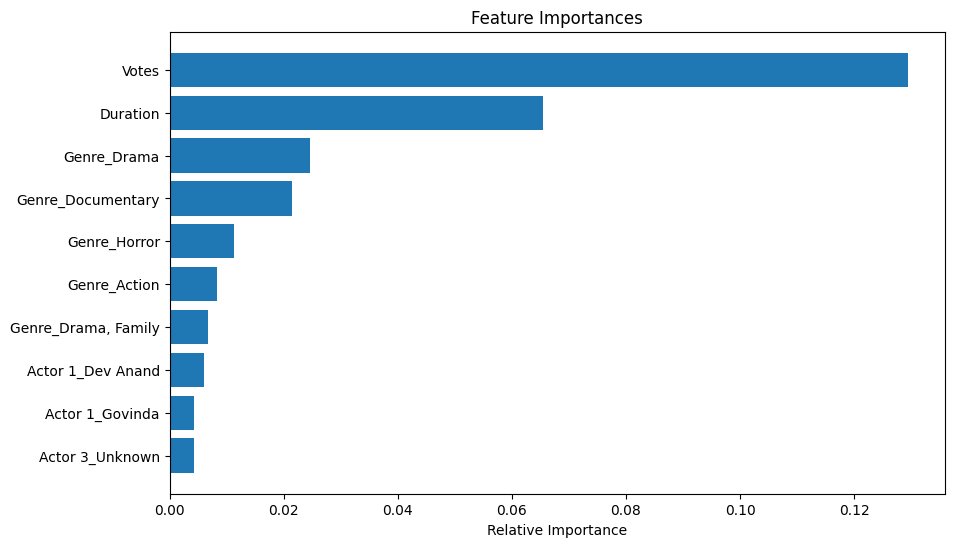

In [ ]:
# Feature Importance for Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [ ]:
# Cross-Validation for Linear Regression
lr = LinearRegression()
cv_scores = cross_val_score(lr, X, y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Average Cross-Validation Score: {np.mean(cv_scores)}')


Cross-Validation Scores: [-1.70138168e+12 -3.69083789e+11 -1.25634095e+12 -3.74689821e+12
 -1.36480014e+13]
Average Cross-Validation Score: -4144341208949.182
